In [1]:
import os
from IPython.display import display, Markdown
from typing import TypedDict
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, END


os.environ.setdefault("no_proxy", "127.0.0.1,localhost")
os.environ.setdefault("HTTPX_NO_PROXY", "127.0.0.1,localhost")
OLLAMA_URL = os.getenv("OLLAMA_URL", "http://127.0.0.1:11434")

model_name = "llama3.2:3b"
max_tokens = 100
llm = ChatOllama(model=model_name, base_url=OLLAMA_URL, num_predict=max_tokens, temperature=0)

# ---------- Shared State ----------
class DevTeamState(TypedDict):
    product: str
    architecture: str
    backend: str
    frontend: str
    tests: str


# ---------- Tech Lead ----------
def tech_lead(state: DevTeamState):
    prompt = f"""
    You are a tech lead.
    Design system architecture for this product:

    {state['product']}
    Include backend, frontend, and testing strategy.
    """
    res = llm.invoke([HumanMessage(content=prompt)])
    return {"architecture": res.content}


# ---------- Backend Developer ----------
def backend_dev(state: DevTeamState):
    prompt = f"""
    You are a backend engineer.
    Implement backend API based on this architecture:

    {state['architecture']}
    Use Python (FastAPI style).
    """
    res = llm.invoke([HumanMessage(content=prompt)])
    return {"backend": res.content}


# ---------- Frontend Developer ----------
def frontend_dev(state: DevTeamState):
    prompt = f"""
    You are a frontend engineer.
    Create frontend structure using React.

    Backend API:
    {state['backend']}
    """
    res = llm.invoke([HumanMessage(content=prompt)])
    return {"frontend": res.content}


# ---------- QA Tester ----------
def tester(state: DevTeamState):
    prompt = f"""
    You are a QA engineer.
    Write test cases and edge cases for this system.

    Backend:
    {state['backend']}

    Frontend:
    {state['frontend']}
    """
    res = llm.invoke([HumanMessage(content=prompt)])
    return {"tests": res.content}

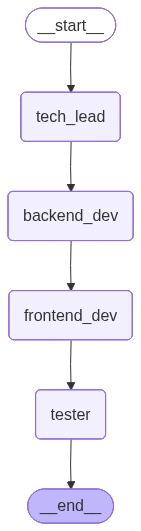

In [2]:
# ---------- Graph ----------
graph = StateGraph(DevTeamState)

graph.add_node("tech_lead", tech_lead)
graph.add_node("backend_dev", backend_dev)
graph.add_node("frontend_dev", frontend_dev)
graph.add_node("tester", tester)

graph.set_entry_point("tech_lead")
graph.add_edge("tech_lead", "backend_dev")
graph.add_edge("backend_dev", "frontend_dev")
graph.add_edge("frontend_dev", "tester")
graph.add_edge("tester", END)

app = graph.compile()
app

In [48]:
# ---------- Run ----------
result = app.invoke({
    "product": "give me A simple TODO app with CRUD operations"
})

print( display(Markdown("# **ARCHITECTURE:** \n----\n" + result["architecture"])))
print( display(Markdown("# **BACKEND:**<br> \n --- \n" + result["backend"])))
print( display(Markdown("# **FRONTEND:**<br> \n --- \n" + result["frontend"])))
print( display(Markdown("# **TESTS:**<br> \n --- \n" + result["tests"])))

# **ARCHITECTURE:** 
----
**Design System Architecture for Simple TODO App**

**Overview**
-----------

The design system architecture for the simple TODO app will consist of three main components: Backend, Frontend, and Testing. The goal is to create a scalable, maintainable, and efficient system that meets the requirements of the product.

**Backend (Node.js + Express)**
-----------------------------

### Dependencies

*   `express`: 4.x
*   `mongoose`: 6.x
*   `bcryptjs`: 2.x

None


# **BACKEND:**<br> 
 --- 
Here's an example implementation of the backend API using Node.js, Express, and Mongoose:

```javascript
// Import required dependencies
const express = require('express');
const mongoose = require('mongoose');
const bcrypt = require('bcryptjs');

// Connect to MongoDB
mongoose.connect('mongodb://localhost:27017/todo-app', {
    useNewUrlParser: true,
    useUnifiedTopology: true
});

// Define the User schema
const userSchema = new mongoose.Schema({
    name: String,
   

None


# **FRONTEND:**<br> 
 --- 
Here's a basic frontend structure using React for a Todo App, assuming you have already set up the backend API.

**Step 1: Create a new React app**

```bash
npx create-react-app todo-app
```

**Step 2: Install required dependencies**

In your project directory, install the following dependencies:

```bash
npm install axios react-hook-form
```

**Step 3: Create components**

Create the following components in the `src` directory:

### **App

None


# **TESTS:**<br> 
 --- 
Here are some test cases and edge cases for the system:

**Backend Test Cases:**

1. **User Registration**
	* Test Case: Successful registration of a new user.
	* Preconditions: User has provided all required fields (name, email, password).
	* Steps:
		+ Send a POST request to `/users` with valid data.
		+ Verify that the response contains the expected user data.
	* Expected Result: The user is created successfully and stored in the database

None
